In [1]:
from nltk.corpus import reuters
from sklearn.model_selection import train_test_split

# Download the Reuters-21578 dataset if not already downloaded
import nltk
nltk.download('reuters')

# Specify the ten classes
target_classes = ['acq', 'corn', 'crude', 'earn', 'grain', 'interest', 'money-fx', 'ship', 'trade', 'wheat']

# Function to filter documents
def filter_documents(documents, target_classes):
    filtered_docs = []
    for doc_id in documents.fileids():
        categories = set(documents.categories(doc_id))
        if len(categories) == 1 and categories.pop() in target_classes:
            filtered_docs.append(doc_id)
    return filtered_docs

# Filter documents
filtered_documents = filter_documents(reuters, target_classes)

# Split the dataset into training and testing sets
train_docs, test_docs = train_test_split(filtered_documents, test_size=0.2, random_state=42)

# Display the number of documents in the filtered dataset
print(f"Number of filtered training documents: {len(train_docs)}")
print(f"Number of filtered testing documents: {len(test_docs)}")


[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Ritik\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


Number of filtered training documents: 6152
Number of filtered testing documents: 1539


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from nltk.corpus import reuters
import numpy as np

# Download the Reuters-21578 dataset if not already downloaded
import nltk
nltk.download('reuters')

# Specify the ten classes
target_classes = ['acq', 'corn', 'crude', 'earn', 'grain', 'interest', 'money-fx', 'ship', 'trade', 'wheat']

# Function to filter and get text content of documents
def get_filtered_texts(documents, target_classes):
    filtered_texts = []
    for doc_id in documents.fileids():
        categories = set(documents.categories(doc_id))
        if len(categories) == 1 and categories.pop() in target_classes:
            filtered_texts.append(' '.join(documents.words(doc_id)))
    return filtered_texts

# Filter and get text content of documents
filtered_texts = get_filtered_texts(reuters, target_classes)

# Define the number of clusters
num_clusters = 10

# Create a pipeline for K-means clustering
pipeline = make_pipeline(TfidfVectorizer(), KMeans(n_clusters=num_clusters, random_state=42))

# Fit the model to the data
pipeline.fit(filtered_texts)

# Get cluster labels
labels = pipeline.named_steps['kmeans'].labels_

# Display the cluster assignments
for i in range(num_clusters):
    cluster_docs = np.array(filtered_texts)[labels == i]
    print(f"\nCluster {i + 1}:\n")
    for doc in cluster_docs[:5]:  # Display the first 5 documents in each cluster
        print(doc)


[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Ritik\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
C:\Users\Ritik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster 1:

CHINA DAILY SAYS VERMIN EAT 7 - 12 PCT GRAIN STOCKS A survey of 19 provinces and seven cities showed vermin consume between seven and 12 pct of China ' s grain stocks , the China Daily said . It also said that each year 1 . 575 mln tonnes , or 25 pct , of China ' s fruit output are left to rot , and 2 . 1 mln tonnes , or up to 30 pct , of its vegetables . The paper blamed the waste on inadequate storage and bad preservation methods . It said the government had launched a national programme to reduce waste , calling for improved technology in storage and preservation , and greater production of additives . The paper gave no further details .
CRA SOLD FORREST GOLD FOR 76 MLN DLRS - WHIM CREEK & lt ; Whim Creek Consolidated NL > said the consortium it is leading will pay 76 . 55 mln dlrs for the acquisition of CRA Ltd ' s & lt ; CRAA . S > & lt ; Forrest Gold Pty Ltd > unit , reported yesterday . CRA and Whim Creek did not disclose the price yesterday . Whim Creek will hold 4

In [3]:
from sklearn.metrics import confusion_matrix, normalized_mutual_info_score, f1_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.cluster import contingency_matrix

# Encode target classes
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform([reuters.categories(doc_id)[0] for doc_id in filtered_documents])

# Evaluate clustering performance
def evaluate_clustering_performance(true_labels, predicted_labels):
    # Purity
    contingency_mat = contingency_matrix(true_labels, predicted_labels)
    purity = np.sum(np.amax(contingency_mat, axis=0)) / np.sum(contingency_mat)

    # Normalized Mutual Information (NMI)
    nmi = normalized_mutual_info_score(true_labels, predicted_labels)

    # F1 score
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    # Rand Index (RI)
    ri = adjusted_rand_score(true_labels, predicted_labels)

    return purity, nmi, f1, ri

# Get predicted labels from the pipeline
predicted_labels = pipeline.predict(filtered_texts)

# Evaluate clustering performance
purity, nmi, f1, ri = evaluate_clustering_performance(true_labels, predicted_labels)

# Display the evaluation metrics
print(f"Purity: {purity:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Rand Index (RI): {ri:.4f}")


Purity: 0.7229
Normalized Mutual Information (NMI): 0.3675
F1 Score: 0.3114
Rand Index (RI): 0.1468


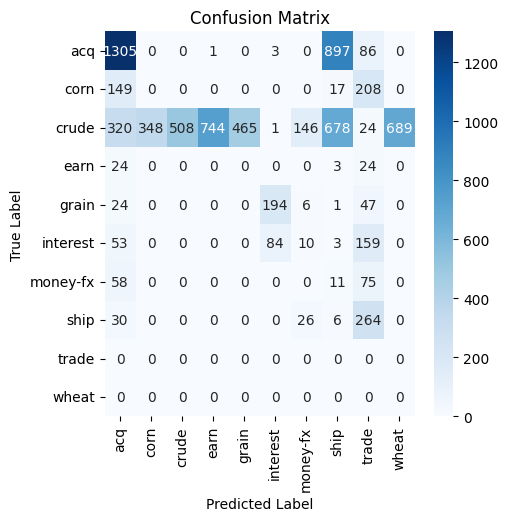


Class: acq
False Positives: 658
False Negatives: 987

Class: corn
False Positives: 348
False Negatives: 374

Class: crude
False Positives: 0
False Negatives: 3415

Class: earn
False Positives: 745
False Negatives: 51

Class: grain
False Positives: 465
False Negatives: 272

Class: interest
False Positives: 198
False Negatives: 225

Class: money-fx
False Positives: 188
False Negatives: 144

Class: ship
False Positives: 1610
False Negatives: 320

Class: trade
False Positives: 887
False Negatives: 0

Class: wheat
False Positives: 689
False Negatives: 0


In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compile confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_classes, yticklabels=target_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Identify classes that give rise to FPs and FNs
for i in range(len(target_classes)):
    false_positives = sum(conf_matrix[:, i]) - conf_matrix[i, i]
    false_negatives = sum(conf_matrix[i, :]) - conf_matrix[i, i]

    print(f"\nClass: {target_classes[i]}")
    print(f"False Positives: {false_positives}")
    print(f"False Negatives: {false_negatives}")
